In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline
# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation
# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 => 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [6]:
from tensorflow.keras.callbacks import TensorBoard

In [2]:
# 데이터를 읽어온다.
df1 = pd.read_csv('./data/breast_cancer.csv')
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              454 non-null    float64
 1   mean texture             454 non-null    float64
 2   mean perimeter           454 non-null    float64
 3   mean area                454 non-null    float64
 4   mean smoothness          454 non-null    float64
 5   mean compactness         454 non-null    float64
 6   mean concavity           454 non-null    float64
 7   mean concave points      454 non-null    float64
 8   mean symmetry            454 non-null    float64
 9   mean fractal dimension   454 non-null    float64
 10  radius error             454 non-null    float64
 11  texture error            454 non-null    float64
 12  perimeter error          454 non-null    float64
 13  area error               454 non-null    float64
 14  smoothness error         4

In [8]:
df1.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [10]:
# 문자열 => 숫자열
encoder1 = LabelEncoder()
df1['target'] = encoder1.fit_transform(df1['target'])
df1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,0.05661,...,32.07,168.20,2022.0,0.13680,0.3101,0.4399,0.22800,0.2268,0.07425,1
450,11.87,21.54,76.83,432.0,0.06613,0.10640,0.08777,0.02386,0.1349,0.06612,...,28.18,83.51,507.2,0.09457,0.3399,0.3218,0.08750,0.2305,0.09952,0
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091,1
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194,0


In [15]:
# 입력과 결과로 나눈다.
X = df1.drop(['target'], axis=1)
y = df1['target']

In [17]:
# 결과 데이터의 종류 수를 파악한다.
len(y.value_counts())

2

In [19]:
# 표준화
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
display(X)

array([[ 1.0716471 , -2.11021126,  1.24691885, ...,  2.21627442,
         2.57629265,  1.89296305],
       [ 1.80872514, -0.29975355,  1.665741  , ...,  1.02843583,
        -0.29491256,  0.27048275],
       [ 1.55731868,  0.55280299,  1.54548514, ...,  1.88116631,
         1.04374227,  0.19229093],
       ...,
       [ 1.52874976,  1.47150615,  1.4501098 , ...,  0.43900458,
        -1.00379467, -1.25588676],
       [-0.63963097,  2.26281581, -0.66183197, ..., -0.68959168,
        -0.76491536, -0.11396037],
       [ 0.0831626 , -1.22825622,  0.04684827, ..., -0.15491471,
        -0.51828023, -0.32247189]])

In [20]:
# 2진 분류 옵션들
out_nodes = 1
loss_function = 'binary_crossentropy'
activation_function = 'sigmoid'

# 다중 분류 옵션들
# out_nodes = len(y.value_counts())
# loss_function = 'categorical_crossentropy'
# activation_function = 'softmax'

# 회귀
# 출력 결과를 하나만 뽑아서 Series로 나왔다면...
# 1로 설정한다.
# if type(y) is pd.core.series.Series:
#     out_nodes = 1
# else : 
#     out_nodes = y.shape[1]
    
# loss_function = 'mean_squared_error'

In [21]:
# 입력노드의 개수
# 입력 데이터 행 하나의 컬럼의 개수
input_size = X.shape[1]
input_size

30

In [31]:
# 신경망 설계
model = Sequential()

model.add(Dense(60, input_dim=input_size))
model.add(Activation('relu'))

model.add(Dense(40))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(out_nodes))
model.add(Activation(activation_function))

In [32]:
# 모델 컴파일
model.compile(loss=loss_function, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 60)                1860      
                                                                 
 activation_4 (Activation)   (None, 60)                0         
                                                                 
 dense_5 (Dense)             (None, 40)                2440      
                                                                 
 activation_5 (Activation)   (None, 40)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                820       
                                                                 
 activation_6 (Activation)   (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [33]:
# 학습모델을 저장할 경로
path = './model/21'

# 만약 폴더가 있다면 삭제한다.
if os.path.isdir(path):
    shutil.rmtree(path)

# 폴더를 생성한다.
os.makedirs(os.path.join(path))

In [34]:
path1 = path + '/{epoch}-{val_loss}.h5'
path2 = path + '/best_model.h5'

# 저장콜백
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss', save_best_onlu=True)

In [35]:
# 조기 중단
call3 = EarlyStopping(monitor='val_loss', patience=100)

In [36]:
callbacks = [EarlyStopping(patience=3, monitor='val_loss'), TensorBoard(log_dir='./logs', histogram_freq=1)]

In [37]:
# 학습
# validation_split : 주어진 데이터에서 사용할 검증데이터 비율
history = model.fit(X, y, epochs=20000, batch_size=20, validation_split=0.2, callbacks=[call1, call2, call3])

Epoch 1/20000
19/19 [==============================] - 1s 14ms/step - loss: 0.5243 - accuracy: 0.8292 - val_loss: 0.4070 - val_accuracy: 0.9231
Epoch 2/20000
19/19 [==============================] - 0s 8ms/step - loss: 0.2927 - accuracy: 0.9504 - val_loss: 0.2150 - val_accuracy: 0.9670
Epoch 3/20000
19/19 [==============================] - 0s 8ms/step - loss: 0.1607 - accuracy: 0.9559 - val_loss: 0.1168 - val_accuracy: 0.9670
Epoch 4/20000
19/19 [==============================] - 0s 8ms/step - loss: 0.1017 - accuracy: 0.9725 - val_loss: 0.0879 - val_accuracy: 0.9670
Epoch 5/20000
19/19 [==============================] - 0s 9ms/step - loss: 0.0788 - accuracy: 0.9780 - val_loss: 0.0720 - val_accuracy: 0.9670
Epoch 6/20000
19/19 [==============================] - 0s 9ms/step - loss: 0.0658 - accuracy: 0.9807 - val_loss: 0.0677 - val_accuracy: 0.9780
Epoch 7/20000
19/19 [==============================] - 0s 9ms/step - loss: 0.0599 - accuracy: 0.9752 - val_loss: 0.0590 - val_accuracy: 0.978

In [38]:
# 리스트를 추출한다.
loss_list = history.history['loss']
accuracy_list = history.history['accuracy']
val_loss_list = history.history['val_loss']
val_accuracy_list = history.history['val_accuracy']

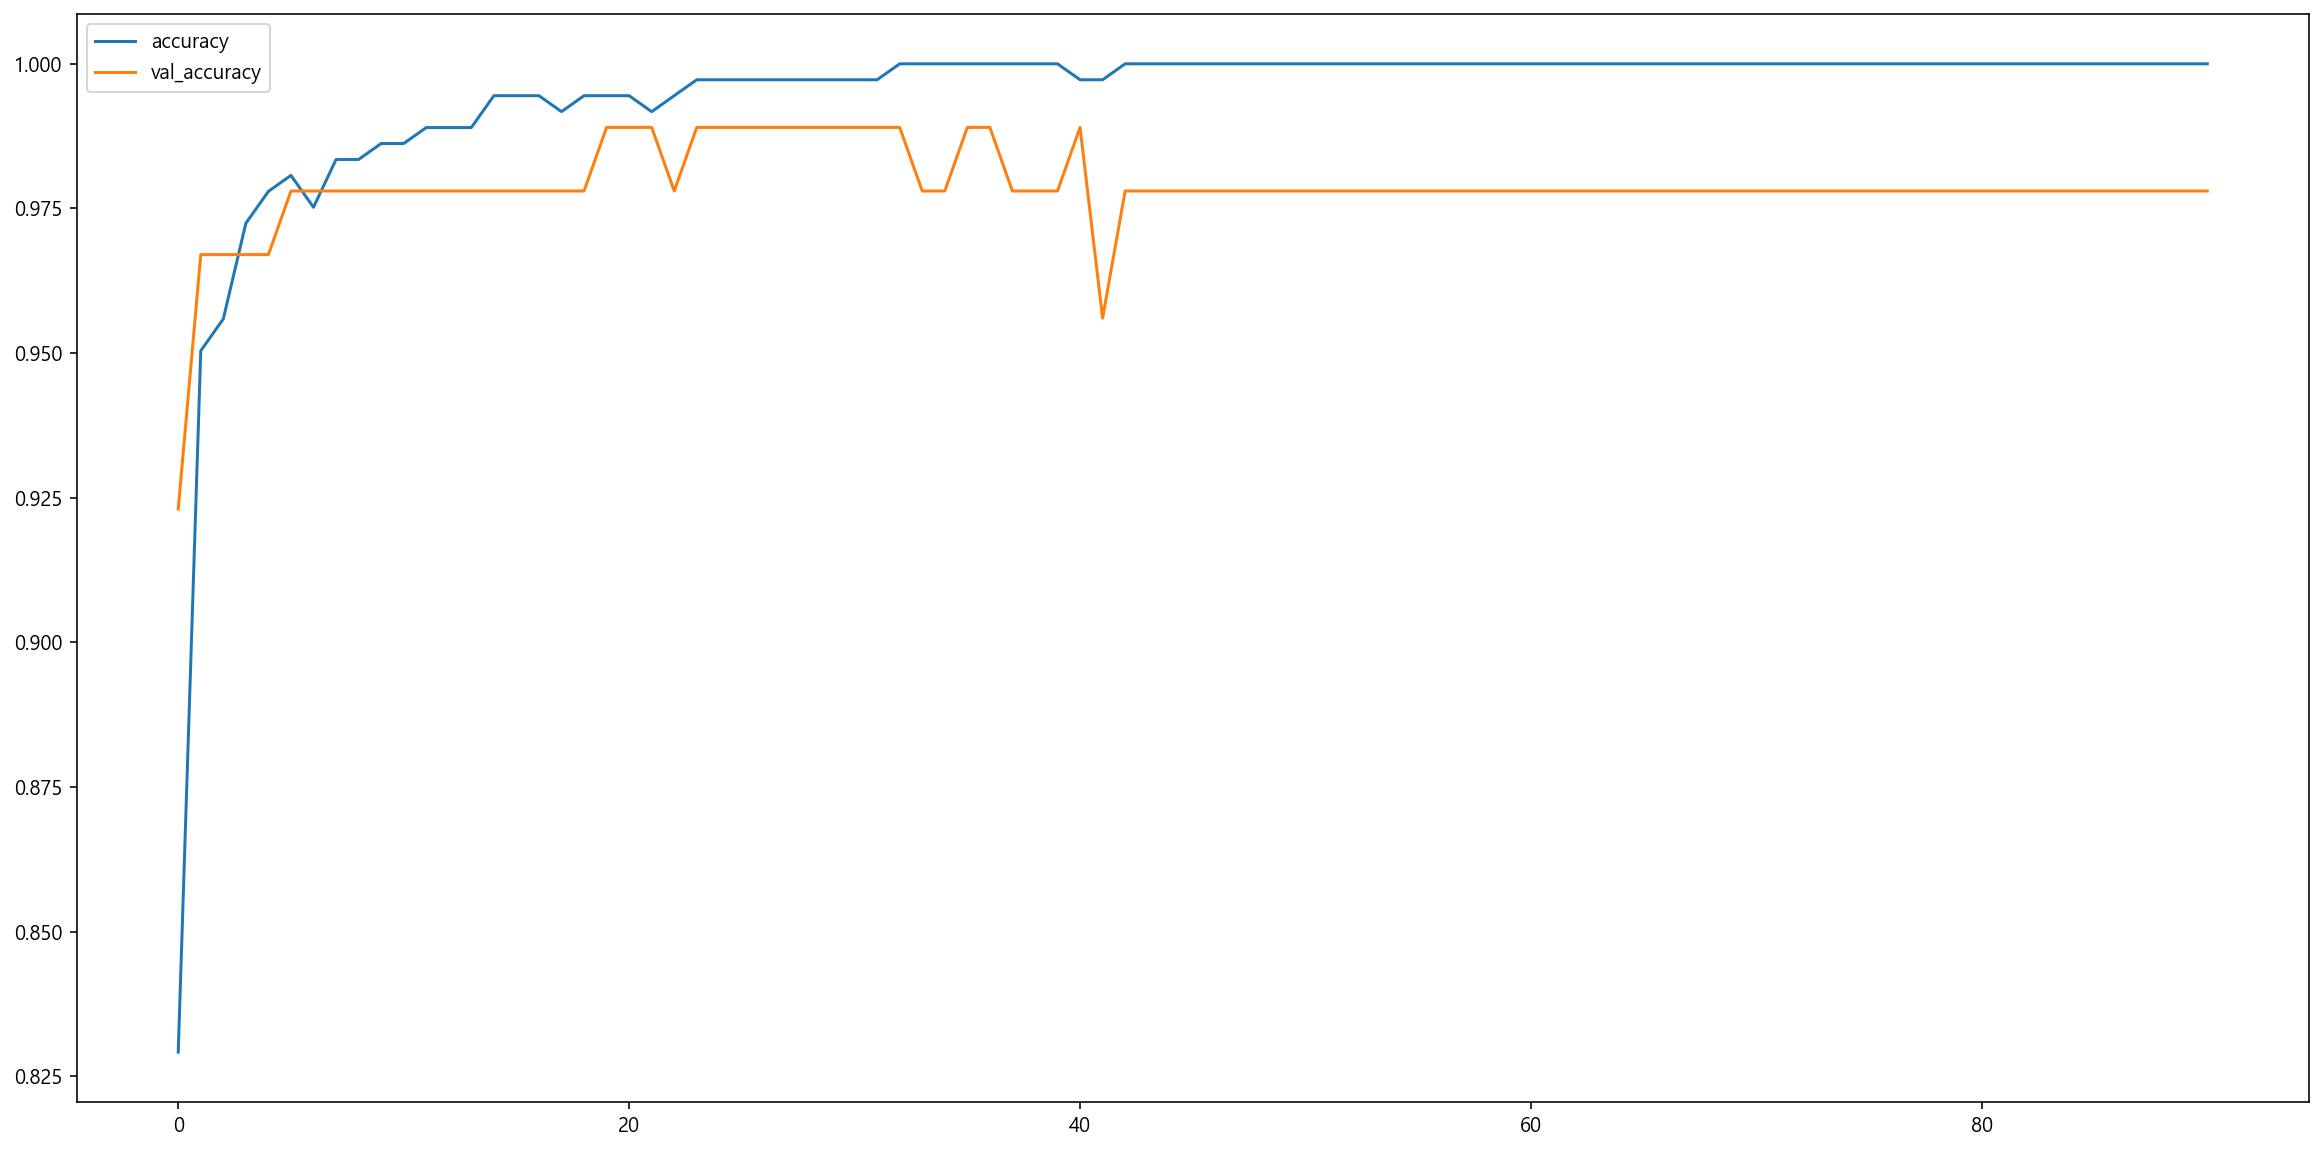

In [44]:
# 정확도 그래프
plt.figure(figsize=(20,10))
plt.plot(accuracy_list[:-50], label='accuracy')
plt.plot(val_accuracy_list[:-50], label = 'val_accuracy')
plt.legend()
plt.show()

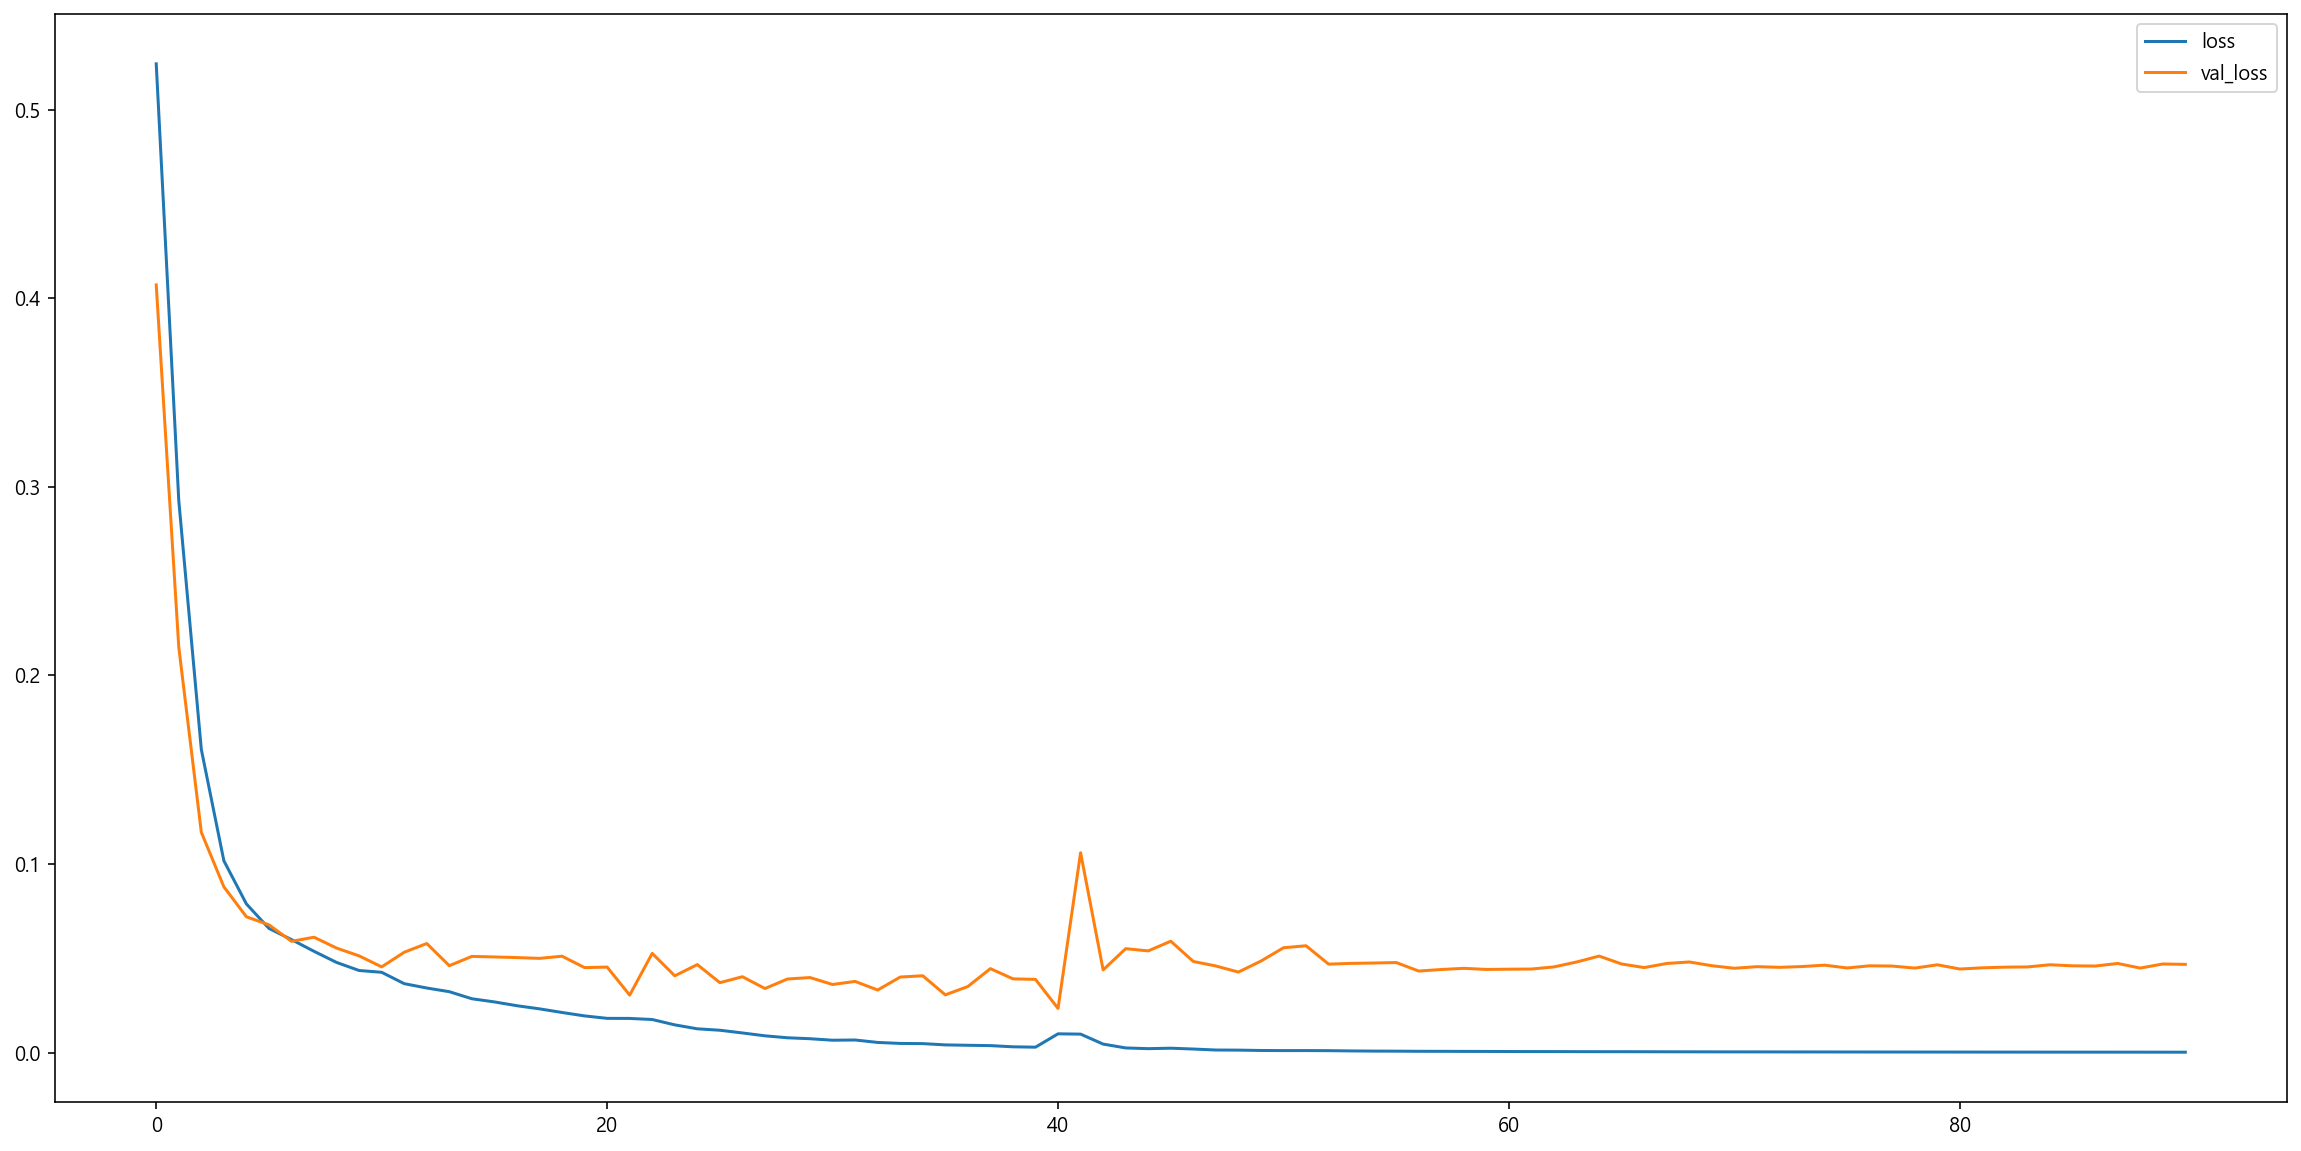

In [45]:
# 정확도 그래프
plt.figure(figsize=(20,10))
plt.plot(loss_list[:-50], label='loss')
plt.plot(val_loss_list[:-50], label = 'val_loss')
plt.legend()
plt.show()

In [46]:
# 모델을 가져온다.
best_model = load_model(path + '/best_model.h5')
best_model

In [47]:
a1 = best_model.evaluate(X, y)
print(f'손실률 : {a1[0]}')
print(f'정확도 : {a1[1]}')

15/15 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9956
손실률 : 0.00956578180193901
정확도 : 0.9955947399139404


In [53]:
# 예측할 데이터를 가져온다.
df2 = pd.read_csv('./data/breast_cancer_new.csv')
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.34,22.15,91.62,633.5,0.1225,0.1517,0.18870,0.09851,0.3270,0.07330
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,13.12,38.81,86.04,527.8,0.1406,0.2031,0.29230,0.06835,0.2884,0.07220
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              115 non-null    float64
 1   mean texture             115 non-null    float64
 2   mean perimeter           115 non-null    float64
 3   mean area                115 non-null    float64
 4   mean smoothness          115 non-null    float64
 5   mean compactness         115 non-null    float64
 6   mean concavity           115 non-null    float64
 7   mean concave points      115 non-null    float64
 8   mean symmetry            115 non-null    float64
 9   mean fractal dimension   115 non-null    float64
 10  radius error             115 non-null    float64
 11  texture error            115 non-null    float64
 12  perimeter error          115 non-null    float64
 13  area error               115 non-null    float64
 14  smoothness error         1

In [51]:
df2.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [54]:
# 표준화
X = scaler1.fit_transform(df2)
display(X)

array([[-0.29900688, -0.6770685 , -0.33808329, ..., -0.09445013,
         1.11992838, -0.6231618 ],
       [-0.08596332,  2.09987506, -0.10631716, ..., -0.44419206,
        -1.172606  , -0.4140073 ],
       [-0.57652414,  1.80724209, -0.57106497, ..., -0.59963291,
         0.29598213, -0.68984874],
       ...,
       [ 0.8166686 ,  1.55962959,  0.78347027, ...,  0.63066136,
        -1.12564533, -0.32610178],
       [ 1.93795049,  1.81542763,  2.07196026, ...,  2.69427273,
         2.86387679,  2.45049999],
       [-1.66136437,  0.83520953, -1.66303998, ..., -1.74450172,
         0.26823265, -0.79957907]])

In [65]:
# 예측한다.
pred = best_model.predict(X)
pred = (pred > 0.5).astype('int')
pred = pred.reshape(-1)
pred

4/4 [==============================] - 0s 2ms/step


array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0])

In [66]:
target = encoder1.inverse_transform(pred)
target

array(['benign', 'malignant', 'malignant', 'malignant', 'benign',
       'benign', 'malignant', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'benign', 'benign', 'malignant', 'malignant',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignant', 'benign', 'malignant', 'malignant', 'malignant',
       'malignant', 'benign', 'benign', 'benign', 'malignant', 'benign',
       'malignant', 'malignant', 'malignant', 'malignant', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'malignant', 'benign',
       'malignant', 'benign', 'malignant', 'malignant', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'malignant', 'malignant', 'malig

In [67]:
df2['target'] = target
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,22.15,91.62,633.5,0.1225,0.1517,0.18870,0.09851,0.3270,0.07330,benign
1,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675,malignant
2,11.63,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.02017,0.1799,0.06166,...,38.81,86.04,527.8,0.1406,0.2031,0.29230,0.06835,0.2884,0.07220,malignant
3,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788,malignant
4,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291,benign


In [69]:
# 저장한다.
df2.to_csv('./data/breast_canner_result.csv', index=False)